In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=sns.load_dataset("iris")
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
data["petal_width"].skew()

np.float64(-0.10296674764898116)

In [7]:
data[data.duplicated()]

sepal_length  sepal_width  petal_length  petal_width    species
142           5.8          2.7           5.1          1.9  virginica

In [8]:
data=data.drop_duplicates()

In [9]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [11]:
data["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
data["species"]=data["species"].map({"setosa":0, "versicolor":1, "virginica":2})

In [13]:
data.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [15]:
data["species"].value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

# Data Viusalizing

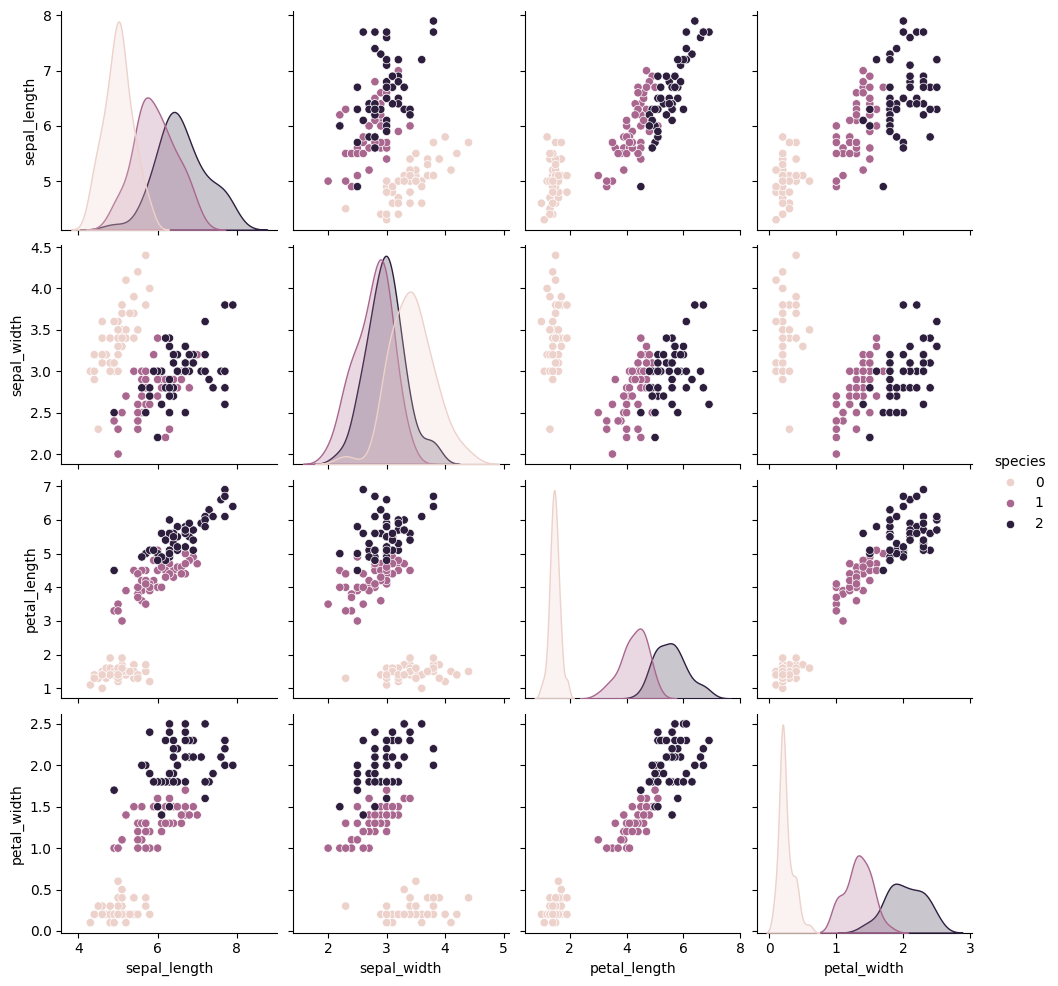

In [16]:
sns.pairplot(data,hue="species")

<Axes: >

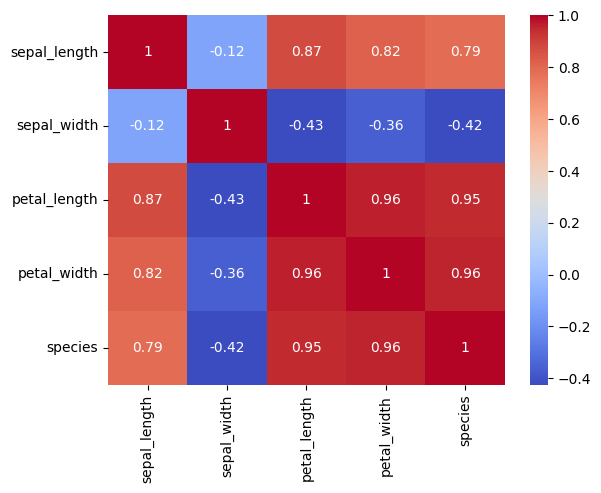

In [17]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

Text(0.5, 1.0, 'Contribution of each species in Output')

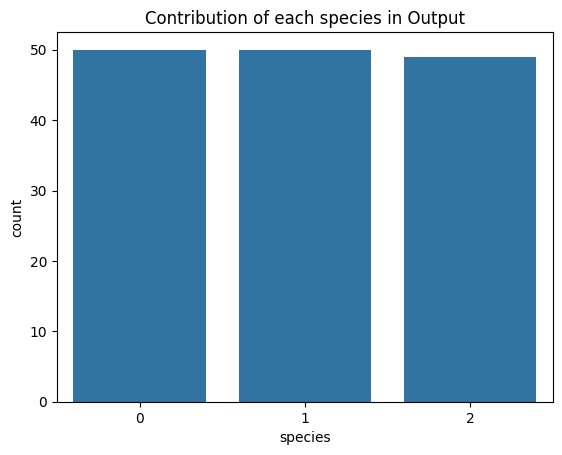

In [18]:
sns.countplot(data=data,x="species")
plt.title("Contribution of each species in Output")

In [19]:
data.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

# Applying Machine Learning Algorithm

In [35]:
x=data.drop(columns="species").values
# x=data.iloc[:, :2].values
y=data["species"].values

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [39]:
x_train.shape,y_train.shape

((119, 4), (119,))

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=lr.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("accuracy score for logistic regression is :",accuracy_score(y_pred,y_test))

accuracy score for logistic regression is : 0.9666666666666667


In [46]:
from sklearn.svm import SVC

In [47]:
clf=SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy score for svc is :",accuracy_score(y_pred,y_test))

accuracy score for svc is : 1.0


In [48]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

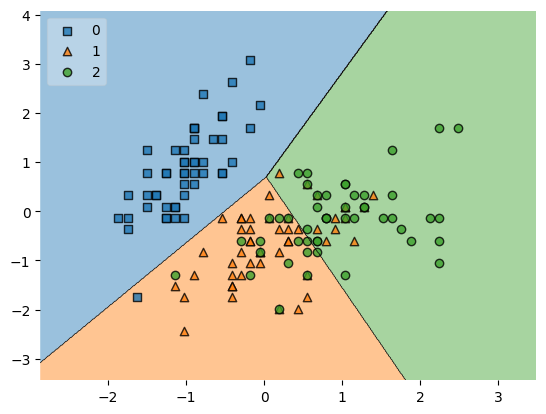

In [34]:
plot_decision_regions(x,y, clf=lr, legend=2)   #used only two column in x 

# Prediction

In [53]:
input_data=[6.2,	3.4,	5.4,	2.3]
input_array=np.array(input_data).reshape(1,4)   
prediction=lr.predict(input_array)


print(prediction)

# "setosa":0, "versicolor":1, "virginica":2

if prediction[0]==0:
    print("The species is setosa")
if prediction[0]==1:
    print("The species is versicolor")
else:
    print("The species is virginica")



[2]
The species is virginica


In [52]:
data.sample()

sepal_length  sepal_width  petal_length  petal_width  species
148           6.2          3.4           5.4          2.3        2